# Heart Failure Prediction - Logistic Regression

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# read data
df = pd.read_csv(r'C:\Users\reetu\Downloads\archive (2)\heart.csv')

# Data Exploration

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
df.shape

(918, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [68]:
#object refers to text values (string data type) only
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [71]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [70]:

# to find how many unique values object features have

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

Age has 50 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
MaxHR has 119 unique value
Oldpeak has 53 unique value
HeartDisease has 2 unique value


In [72]:
df.duplicated().value_counts()

False    918
dtype: int64

In [74]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing (df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


# Data Cleaning

In [15]:
#check for null values. If null values found, either remove those data or replace it with average value. 
#If 8 out of 500 rows are null then remove it. if 100 out of 500 are null then have average value.
#Cleaning also includes getting rid of noise (unwanted data for predictive analysis). In this case may be 'Id' or Name if it was there
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [75]:
df = pd.get_dummies(df, drop_first=True)

In [76]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


# Visualization

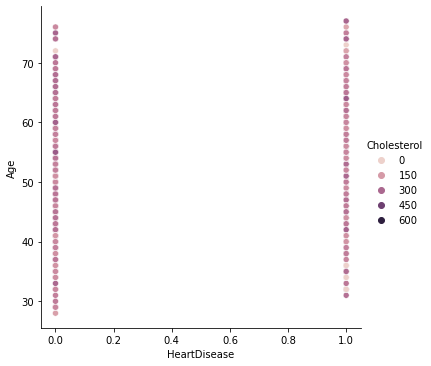

In [29]:
sns.relplot(x='HeartDisease', y='Age', hue='Cholesterol', data=df)

# Modelling

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [133]:
#create training and testing data. we want to predict heart disease so dont include it in training data. We want to test it so include it there.
inputdata = df.drop(['HeartDisease'], axis=1)
outputdata = df['HeartDisease']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(inputdata, outputdata, test_size = 0.3, random_state =101)

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [136]:
X_train_scaled = scaler.fit_transform(X_train)

In [137]:
X_test_scaled = scaler.transform(X_test)

In [138]:
def model_first_insight(X_train, y_train, class_weight, solver='liblinear'):
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight)
    log.fit(X_train, y_train)
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    return log

In [139]:
def models(X_train, y_train, class_weight):
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log}")
    return log.score(X_train, y_train)

In [144]:
def models_accuracy(X_Set, y_Set):    
    Scores = pd.DataFrame(columns = ["LR_Acc"])

    print("\033[1mBASIC ACCURACY\033[0m")
    Basic = log_acc = models(X_train, y_train, None)
    Scores.loc[0] = Basic

    print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
    Scaled = log_acc = models(X_train_scaled, y_train, None)
    Scores.loc[1] = Scaled

    
    print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
    Balanced = log_acc = models(X_train, y_train, "balanced")
    Scores.loc[2] = Balanced

    print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
    Scaled_Balanced = log_acc = models(X_train_scaled, y_train, "balanced")
    Scores.loc[3] = Scaled_Balanced

    Scores.set_axis(['Basic', 'Scaled', 'Balanced', 'Scaled_Balanced'], axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

In [145]:
models_accuracy(X_train, y_train)

BASIC ACCURACY
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')

SCALED ACCURACY WITHOUT BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')

BASIC ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')

SCALED ACCURACY WITH BALANCED
1) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')


,LR_Acc
Basic,0.880062
Scaled,0.890966
Balanced,0.875389
Scaled_Balanced,0.880062


In [148]:
y_pred_proba = LR_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.74181972, 0.25818028],
       [0.05144462, 0.94855538],
       [0.95689644, 0.04310356],
       [0.04409007, 0.95590993],
       [0.24969744, 0.75030256],
       [0.07831851, 0.92168149],
       [0.94843723, 0.05156277],
       [0.94104754, 0.05895246],
       [0.38222277, 0.61777723],
       [0.603634  , 0.396366  ],
       [0.25975895, 0.74024105],
       [0.05464215, 0.94535785],
       [0.92227337, 0.07772663],
       [0.0198929 , 0.9801071 ],
       [0.04807948, 0.95192052],
       [0.91668314, 0.08331686],
       [0.5692733 , 0.4307267 ],
       [0.80253831, 0.19746169],
       [0.07258302, 0.92741698],
       [0.0837695 , 0.9162305 ],
       [0.19088473, 0.80911527],
       [0.88519433, 0.11480567],
       [0.96369663, 0.03630337],
       [0.98671254, 0.01328746],
       [0.94413936, 0.05586064],
       [0.95083089, 0.04916911],
       [0.05957828, 0.94042172],
       [0.51951127, 0.48048873],
       [0.72712557, 0.27287443],
       [0.74610391, 0.25389609],
       [0.

In [149]:
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
861,65,110,248,0,158,0.6,1,0,0,0,0,0,0,0,1,1,0,0.304242
809,48,124,255,1,175,0.0,1,0,1,0,1,0,0,0,1,0,0,0.129545
157,49,140,185,0,130,0.0,1,0,0,0,1,0,0,0,1,0,0,0.253896
583,69,142,271,0,126,0.3,1,0,1,0,0,0,0,0,1,0,0,0.114806
127,48,108,163,0,175,2.0,0,0,0,0,1,0,0,0,1,0,0,0.089057
532,55,116,186,1,102,0.0,1,0,0,0,0,1,0,1,0,1,1,0.945358
23,44,150,288,0,150,3.0,1,1,0,0,1,0,1,1,0,1,1,0.752479
225,50,145,264,0,150,0.0,1,0,0,0,1,0,0,1,0,1,1,0.777560
584,64,141,244,1,116,1.5,1,0,0,0,0,1,1,1,0,1,1,0.983840
399,61,200,0,1,70,0.0,1,0,1,0,0,1,0,1,0,1,1,0.920361
